<span style="color: blue;font-weight: bold; font-size: 40px;">ISBSG Data Analysis & Regression </span>


In [1]:
# <span style="color: blue;">ISBSG Data Analysis & Regression</span>


In [2]:
# # ISBSG Data Analysis and Regression Modeling
# 
# This notebook performs data cleaning, preprocessing, and regression modeling on the ISBSG dataset.

# ## Setup and Environment Configuration

# Install required packages (uncomment if needed)
# !pip install -r requirements.txt

In [3]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Data Profiling
- [Part 4](#part4)- Module Building with PyCaret
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End


In [4]:
# Configure timestamp callback for Jupyter cells
from IPython import get_ipython

def setup_timestamp_callback():
    """Setup a timestamp callback for Jupyter cells without clearing existing callbacks."""
    ip = get_ipython()
    if ip is not None:
        # Define timestamp function
        def print_timestamp(*args, **kwargs):
            """Print timestamp after cell execution."""
            print(f"Cell executed at: {datetime.now()}")
        
        # Check if our callback is already registered
        callbacks = ip.events.callbacks.get('post_run_cell', [])
        for cb in callbacks:
            if hasattr(cb, '__name__') and cb.__name__ == 'print_timestamp':
                # Already registered
                return
                
        # Register new callback if not already present
        ip.events.register('post_run_cell', print_timestamp)
        print("Timestamp printing activated.")
    else:
        print("Not running in IPython/Jupyter environment.")

In [5]:
# Setup timestamp callback
setup_timestamp_callback()

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Timestamp printing activated.
Cell executed at: 2025-05-17 18:54:20.141920


[Back to top](#Index:)

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [6]:
# Load the data
print("Loading data...")
df = pd.read_csv("data/ISBSG2016R1.1-Formatted4CSVAgileOnly_cleaned.csv")


Loading data...
Cell executed at: 2025-05-17 18:54:20.149313


In [7]:
# Clean column names function
def clean_column_names(columns):
    cleaned_cols = []
    for col in columns:
        # First replace ampersands with _&_ to match PyCaret's transformation
        col_clean = col.replace(' & ', '_&_')
        # Then remove any remaining special chars
        col_clean = re.sub(r'[^\w\s&]', '', col_clean)
        # Finally replace spaces with underscores
        col_clean = col_clean.replace(' ', '_')
        cleaned_cols.append(col_clean)
    return cleaned_cols

# Clean column names
original_columns = df.columns.tolist()  # Save original column names for reference
df.columns = clean_column_names(df.columns)

Cell executed at: 2025-05-17 18:54:20.164284


In [8]:
# Create a mapping from original to cleaned column names
column_mapping = dict(zip(original_columns, df.columns))
print("\nColumn name mapping (original -> cleaned):")
for orig, clean in column_mapping.items():
    if orig != clean:  # Only show columns that changed
        print(f"  '{orig}' -> '{clean}'")



Column name mapping (original -> cleaned):
Cell executed at: 2025-05-17 18:54:20.179600


In [9]:
# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (85, 50)

First 5 rows:
   isbsg_project_id external_eef_data_quality_rating  \
0             10279                                b   
1             10317                                b   
2             10572                                b   
3             11278                                a   
4             11497                                b   

   project_prf_year_of_project external_eef_industry_sector  \
0                         2013                      banking   
1                         2015                   government   
2                         2014                   government   
3                         2010             service industry   
4                         2012                      banking   

                      external_eef_organisation_type  \
0  banking; communications; education institution...   
1                                         government   
2                                         government   
3                    

In [10]:
# Create a function to get comprehensive data summary
def get_data_summary(df, n_unique_samples=5):
    """
    Generate a comprehensive summary of the dataframe.
    
    Args:
        df: Pandas DataFrame
        n_unique_samples: Number of unique values to show as sample
        
    Returns:
        DataFrame with summary information
    """
    # Summary dataframe with basic info
    summary = pd.DataFrame({
        'Feature': df.columns,
        'data_type': df.dtypes.values,
        'Null_number': df.isnull().sum().values,
        'Null_pct': (df.isnull().mean() * 100).values,
        'Unique_counts': df.nunique().values,
        'unique_samples': [list(df[col].dropna().unique()[:n_unique_samples]) for col in df.columns]
    })
    
    return summary

# Generate and display data summary
summary_df = get_data_summary(df)
print("\nData Summary (first 10 columns):")
print(summary_df.head(10))



Data Summary (first 10 columns):
                            Feature data_type  Null_number   Null_pct  \
0                  isbsg_project_id     int64            0   0.000000   
1  external_eef_data_quality_rating    object            0   0.000000   
2       project_prf_year_of_project     int64            0   0.000000   
3      external_eef_industry_sector    object            1   1.176471   
4    external_eef_organisation_type    object            0   0.000000   
5     project_prf_application_group    object            5   5.882353   
6      project_prf_application_type    object            0   0.000000   
7      project_prf_development_type    object            0   0.000000   
8      tech_tf_development_platform    object           15  17.647059   
9             tech_tf_language_type    object            0   0.000000   

   Unique_counts                                     unique_samples  
0             84                [10279, 10317, 10572, 11278, 11497]  
1              2      

In [11]:
# Display descriptive statistics for numeric columns
desc_stats = df.describe().T
print("\nDescriptive Statistics (first 5 rows):")
print(desc_stats.head())


Descriptive Statistics (first 5 rows):
                                        count          mean          std  \
isbsg_project_id                         85.0  21197.176471  6796.647824   
project_prf_year_of_project              85.0   2011.376471     2.132383   
project_prf_functional_size              84.0    188.464286   316.182327   
project_prf_normalised_work_effort       85.0   2590.352941  8670.472883   
project_prf_normalised_level_1_pdr_ufp   84.0     12.248810    23.753014   

                                            min       25%      50%        75%  \
isbsg_project_id                        10279.0  14928.00  20465.0  27063.000   
project_prf_year_of_project              2005.0   2010.00   2012.0   2013.000   
project_prf_functional_size                 2.0     23.75     83.5    170.250   
project_prf_normalised_work_effort          6.0     82.00    489.0   1047.000   
project_prf_normalised_level_1_pdr_ufp      0.2      2.25      3.5     11.075   

                

In [12]:
# Identify target column
target_col = 'project_prf_normalised_work_effort'
print(f"\nTarget variable: '{target_col}'")


Target variable: 'project_prf_normalised_work_effort'
Cell executed at: 2025-05-17 18:54:20.302260


[Back to top](#Index:)

<a id='part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [13]:
# Analyse missing values
print("\nAnalysing missing values...")
missing_pct = df.isnull().mean() * 100
missing_sorted = missing_pct.sort_values(ascending=False)
print("Top 10 columns with highest missing percentages:")
print(missing_sorted.head(10))


Analysing missing values...
Top 10 columns with highest missing percentages:
people_prf_it_experience_1_to_3_yr               100.000000
people_prf_it_experience_great_than_3_yr         100.000000
people_prf_it_experience_less_than_1_yr          100.000000
people_prf_project_user_involvement              100.000000
tech_tf_type_of_server                           100.000000
process_pmf_prototyping_used                      95.294118
people_prf_ba_team_experience_less_than_1_yr      84.705882
project_prf_case_tool_used                        83.529412
people_prf_ba_team_experience_great_than_3_yr     82.352941
people_prf_it_experience_great_than_9_yr          82.352941
dtype: float64
Cell executed at: 2025-05-17 18:54:20.317549


In [14]:
# Identify columns with high missing values (>70%)
high_missing_cols = missing_pct[missing_pct > 70].index.tolist()
print(f"\nColumns with >70% missing values ({len(high_missing_cols)} columns):")
for col in high_missing_cols[:5]:  # Show first 5
    print(f"  - {col}: {missing_pct[col]:.2f}% missing")
if len(high_missing_cols) > 5:
    print(f"  - ... and {len(high_missing_cols) - 5} more columns")


Columns with >70% missing values (16 columns):
  - project_prf_case_tool_used: 83.53% missing
  - process_pmf_prototyping_used: 95.29% missing
  - tech_tf_client_roles: 70.59% missing
  - tech_tf_type_of_server: 100.00% missing
  - people_prf_project_user_involvement: 100.00% missing
  - ... and 11 more columns
Cell executed at: 2025-05-17 18:54:20.327768


In [15]:
# Create a clean dataframe by dropping high-missing columns
df_clean = df.drop(columns=high_missing_cols)
print(f"\nData shape after dropping high-missing columns: {df_clean.shape}")
print(f"\nHigh missing columns got dropped are: {high_missing_cols}")

# Numerical columns
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical columns:")
print(num_cols)

# Categorical columns (object or category dtype)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:")
print(cat_cols)




Data shape after dropping high-missing columns: (85, 34)

High missing columns got dropped are: ['project_prf_case_tool_used', 'process_pmf_prototyping_used', 'tech_tf_client_roles', 'tech_tf_type_of_server', 'people_prf_project_user_involvement', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr', 'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'project_prf_currency_multiple']

Numerical columns:
['isbsg_project_id', 'project_prf_year_of_project', 'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_defect_density', 'project_prf_speed_of_delivery', 'project

In [16]:
# Handle remaining missing values
print("\nHandling remaining missing values...")


Handling remaining missing values...
Cell executed at: 2025-05-17 18:54:20.352109


In [17]:
# Fill missing values in categorical columns with "Missing"
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_clean[col].fillna('Missing', inplace=True)

Cell executed at: 2025-05-17 18:54:20.369779


In [18]:
# Check remaining missing values
remaining_missing = df_clean.isnull().sum()
remaining_missing_count = sum(remaining_missing > 0)
print(f"\nColumns with remaining missing values: {remaining_missing_count}")
if remaining_missing_count > 0:
    print("Top columns with missing values:")
    print(remaining_missing[remaining_missing > 0].sort_values(ascending=False).head())


Columns with remaining missing values: 12
Top columns with missing values:
project_prf_total_project_cost       57
project_prf_defect_density           55
people_prf_project_manage_changes    55
people_prf_personnel_changes         55
tech_tf_tools_used                   31
dtype: int64
Cell executed at: 2025-05-17 18:54:20.381686


In [19]:
# Verify target variable
print(f"\nTarget variable '{target_col}' summary:")
print(f"Unique values: {df_clean[target_col].nunique()}")
print(f"Missing values: {df_clean[target_col].isnull().sum()}")
print(f"Top value counts:")
print(df_clean[target_col].value_counts().head())



Target variable 'project_prf_normalised_work_effort' summary:
Unique values: 78
Missing values: 0
Top value counts:
project_prf_normalised_work_effort
47      4
225     2
1105    2
125     2
51      2
Name: count, dtype: int64
Cell executed at: 2025-05-17 18:54:20.394845


In [20]:
# Check for infinite values
inf_check = np.isinf(df_clean.select_dtypes(include=[np.number])).sum().sum()
print(f"\nNumber of infinite values: {inf_check}")


Number of infinite values: 0
Cell executed at: 2025-05-17 18:54:20.401280


In [21]:
# Save cleaned data
df_clean.to_csv('data/cleaned_data.csv', index=False)
print("\nCleaned data saved to 'data/cleaned_data.csv'")



Cleaned data saved to 'data/cleaned_data.csv'
Cell executed at: 2025-05-17 18:54:20.418699


[Back to top](#Index:)

<a id='part3'></a>

# Part 3 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [22]:
# Identify categorical columns and check cardinality
print("\nCategorical columns and their cardinality:")
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols[:5]:  # Show first 5
    print(f"  {col}: {df_clean[col].nunique()} unique values")
if len(cat_cols) > 5:
    print(f"  ... and {len(cat_cols) - 5} more columns")


Categorical columns and their cardinality:
  external_eef_data_quality_rating: 2 unique values
  external_eef_industry_sector: 12 unique values
  external_eef_organisation_type: 25 unique values
  project_prf_application_group: 5 unique values
  project_prf_application_type: 32 unique values
  ... and 13 more columns
Cell executed at: 2025-05-17 18:54:20.436027


In [23]:
# One-hot encode categorical columns with low cardinality (<10 unique values)
low_card_cols = [col for col in cat_cols if df_clean[col].nunique() < 10]
print(f"\nApplying one-hot encoding to {len(low_card_cols)} low-cardinality columns:")
for col in low_card_cols[:5]:  # Show first 5
    print(f"  - {col}")
if len(low_card_cols) > 5:
    print(f"  - ... and {len(low_card_cols) - 5} more columns")



Applying one-hot encoding to 14 low-cardinality columns:
  - external_eef_data_quality_rating
  - project_prf_application_group
  - project_prf_development_type
  - tech_tf_development_platform
  - tech_tf_language_type
  - ... and 9 more columns
Cell executed at: 2025-05-17 18:54:20.449613


In [24]:
# Create encoded dataframe
df_encoded = pd.get_dummies(df_clean, columns=low_card_cols, drop_first=True)
print(f"\nData shape after one-hot encoding: {df_encoded.shape}")
print("\nAll column names:")
print(df_encoded.columns.tolist())



Data shape after one-hot encoding: (85, 72)

All column names:
['isbsg_project_id', 'project_prf_year_of_project', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_type', 'project_prf_functional_size', 'project_prf_normalised_work_effort', 'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 'project_prf_defect_density', 'project_prf_speed_of_delivery', 'project_prf_manpower_delivery_rate', 'project_prf_project_elapsed_time', 'project_prf_max_team_size', 'process_pmf_docs', 'tech_tf_server_roles', 'tech_tf_tools_used', 'people_prf_project_manage_changes', 'people_prf_personnel_changes', 'project_prf_total_project_cost', 'external_eef_data_quality_rating_b', 'project_prf_application_group_business application', 'project_prf_application_group_infrastructure software', 'project_prf_application_group_mathematically-intensive application', 'project_prf_application_group_real-time application', 'project_prf_development_type_ne

In [25]:
# MANUALLY fix the problematic column names BEFORE PyCaret setup

# Function to fix the column names and prevent duplicates
def fix_column_names_no_duplicates(df):
    """Fix column names that cause issues with PyCaret while preventing duplicates."""
    original_cols = df.columns.tolist()
    fixed_columns = []
    
    # Track columns to check for duplicates
    seen_columns = set()
    
    for col in original_cols:
        # Replace spaces with underscores
        fixed_col = col.replace(' ', '_')
        # Replace ampersands 
        fixed_col = fixed_col.replace('&', 'and')
        # Remove any other problematic characters
        fixed_col = ''.join(c if c.isalnum() or c == '_' else '_' for c in fixed_col)
        
        # Handle duplicates by appending a suffix
        base_col = fixed_col
        suffix = 1
        while fixed_col in seen_columns:
            fixed_col = f"{base_col}_{suffix}"
            suffix += 1
        
        seen_columns.add(fixed_col)
        fixed_columns.append(fixed_col)
    
    # Create a new DataFrame with fixed column names
    df_fixed = df.copy()
    df_fixed.columns = fixed_columns
    
    # Print statistics about the renaming
    n_changed = sum(1 for old, new in zip(original_cols, fixed_columns) if old != new)
    print(f"Changed {n_changed} column names.")
    
    # Check for duplicates in the new column names
    dup_check = [item for item, count in pd.Series(fixed_columns).value_counts().items() if count > 1]
    if dup_check:
        print(f"WARNING: Found {len(dup_check)} duplicate column names after fixing: {dup_check}")
    else:
        print("No duplicate column names in the fixed DataFrame.")
    
    return df_fixed

# Show some of the original column names to help diagnose issues
print("\nSample of original column names:")
for i, col in enumerate(df_encoded.columns[:15]):  # Show first 15 for diagnosis
    print(f"{i}: {col}")

# Apply the fix to your dataframe
print("\nFixing column names for PyCaret compatibility...")
df_fixed = fix_column_names_no_duplicates(df_encoded)

# Print some example fixed columns to verify
print("\nSample of fixed column names:")
for i, (old, new) in enumerate(zip(df_encoded.columns[:15], df_fixed.columns[:15])):
    print(f"Original: {old} -> Fixed: {new}")


Sample of original column names:
0: isbsg_project_id
1: project_prf_year_of_project
2: external_eef_industry_sector
3: external_eef_organisation_type
4: project_prf_application_type
5: project_prf_functional_size
6: project_prf_normalised_work_effort
7: project_prf_normalised_level_1_pdr_ufp
8: project_prf_normalised_pdr_ufp
9: project_prf_defect_density
10: project_prf_speed_of_delivery
11: project_prf_manpower_delivery_rate
12: project_prf_project_elapsed_time
13: project_prf_max_team_size
14: process_pmf_docs

Fixing column names for PyCaret compatibility...
Changed 29 column names.
No duplicate column names in the fixed DataFrame.

Sample of fixed column names:
Original: isbsg_project_id -> Fixed: isbsg_project_id
Original: project_prf_year_of_project -> Fixed: project_prf_year_of_project
Original: external_eef_industry_sector -> Fixed: external_eef_industry_sector
Original: external_eef_organisation_type -> Fixed: external_eef_organisation_type
Original: project_prf_application_t

In [26]:
# Save this DataFrame with fixed column names
df_fixed.to_csv('data/fixed_columns_data.csv', index=False)
print(f"Saved data with fixed column names to 'data/fixed_columns_data.csv'")

Saved data with fixed column names to 'data/fixed_columns_data.csv'
Cell executed at: 2025-05-17 18:54:20.508221


In [27]:
# Create a diagnostic file with all column transformations
with open('column_transformations.txt', 'w') as f:
    f.write("Column name transformations:\n")
    f.write("--------------------------\n")
    for old, new in zip(df_encoded.columns, df_fixed.columns):
        f.write(f"{old} -> {new}\n")
print("Saved complete column transformations to 'column_transformations.txt'")

Saved complete column transformations to 'column_transformations.txt'
Cell executed at: 2025-05-17 18:54:20.518723


[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Data Profiling

xxx

In [28]:
# ## Data Profiling (Optional)

try:
    from ydata_profiling import ProfileReport
    
    print("\nGenerating data profile report...")
    profile = ProfileReport(df_clean, title="ISBSG Dataset Profiling Report", minimal=True)
    profile.to_file("data_profile.html")
    print("Data profile report saved to 'data_profile.html'")
except ImportError:
    print("\nSkipping data profiling (ydata_profiling not installed)")
    print("To install: pip install ydata-profiling")


Generating data profile report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|          | 0/34 [00:00<?, ?it/s]
100%|██████████| 34/34 [00:00<00:00, 122.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profile report saved to 'data_profile.html'
Cell executed at: 2025-05-17 18:54:44.005675


[Back to top](#Index:)

<a id='part5'></a>

# Part 5 - PyCaret setup

xxx

In [29]:
from pycaret.regression import setup, get_config

ignore_cols = ['isbsg_project_id', 'external_eef_data_quality_rating',  'project_prf_normalised_level_1_pdr_ufp', 'project_prf_normalised_pdr_ufp', 
               'project_prf_project_elapsed_time', 'people_prf_ba_team_experience_less_than_1_yr', 'people_prf_ba_team_experience_1_to_3_yr', 
               'people_prf_ba_team_experience_great_than_3_yr', 'people_prf_it_experience_less_than_1_yr', 'people_prf_it_experience_1_to_3_yr', 
               'people_prf_it_experience_great_than_3_yr', 'people_prf_it_experience_less_than_3_yr', 'people_prf_it_experience_3_to_9_yr', 
               'people_prf_it_experience_great_than_9_yr', 'people_prf_project_manage_experience', 'project_prf_total_project_cost', 
               'project_prf_cost_currency', 'project_prf_currency_multiple', 'project_prf_speed_of_delivery', 'people_prf_project_manage_changes', 
               'project_prf_defect_density','project_prf_manpower_delivery_rate'
            ]
setup_results = setup(
    data=df_fixed,
    target=target_col,
    ignore_features=ignore_cols,
    session_id=123,
    preprocess=True,
    # ...other options...
    verbose=False
)

Cell executed at: 2025-05-17 18:55:01.208887


[Back to top](#Index:)

<a id='part6'></a>

# Part 6 - Feature Correlation Analysis

xxx


Analyzing feature correlations...
Analyzing correlations among 6 numeric features


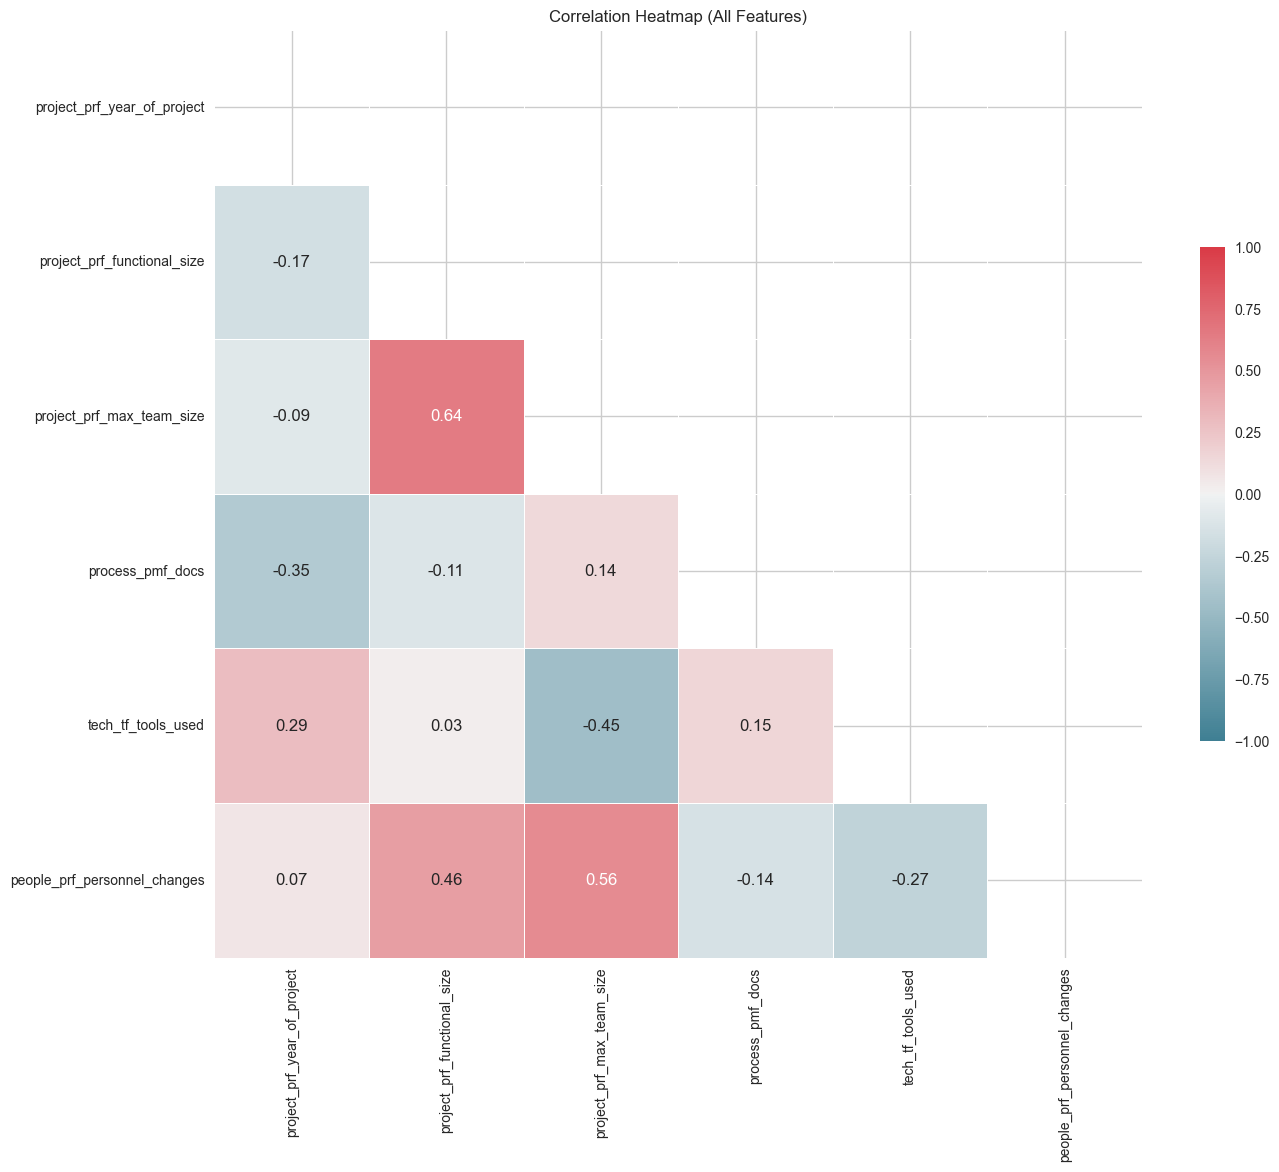

Correlation heatmap saved as plots/correlation_heatmap.png


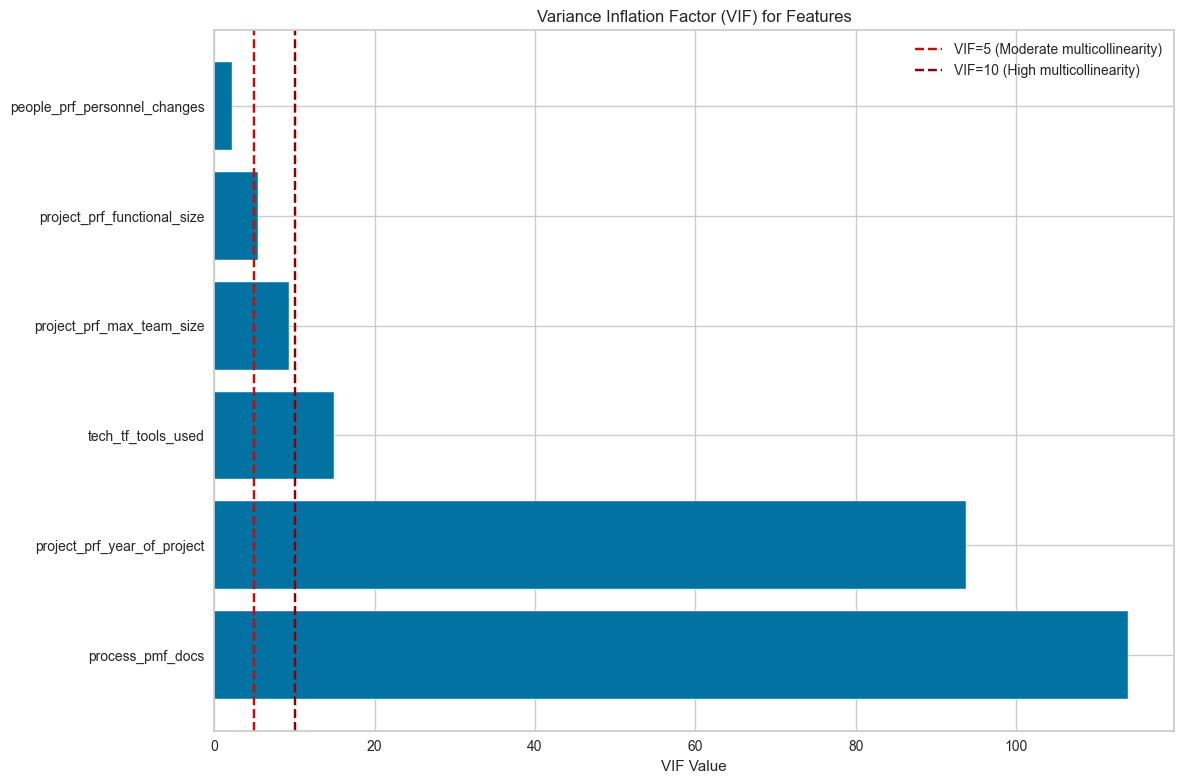

VIF values plot saved as plots/vif_values.png

Found 0 feature pairs with correlation > 0.7:

Features with high VIF (> 10):
  • process_pmf_docs: 114.00
  • project_prf_year_of_project: 93.80
  • tech_tf_tools_used: 14.96

--- Multicollinearity Analysis Recommendations ---
No significant multicollinearity detected based on correlation analysis.

Based on VIF analysis, consider removing or transforming these features with high VIF values.
Cell executed at: 2025-05-17 18:55:02.804807


In [30]:
# Feature correlation analysis
print("\nAnalyzing feature correlations...")
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from pycaret.regression import get_config

    # Create directory for plots
    os.makedirs('plots', exist_ok=True)

    # Get data from PyCaret
    X = get_config('X')

    # Ensure we're working with numeric data only
    X_numeric = X.select_dtypes(include=[np.number])

    # Drop rows with NaN or Inf values before correlation and VIF analysis
    X_numeric_clean = X_numeric.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')

    # Get number of features
    n_features = X_numeric_clean.shape[1]
    print(f"Analyzing correlations among {n_features} numeric features")

    # Calculate correlation matrix
    corr_matrix = X_numeric_clean.corr()

    # Determine features with high correlation
    correlation_threshold = 0.7
    high_corr_pairs = []

    # Find highly correlated feature pairs
    for i in range(n_features):
        for j in range(i+1, n_features):
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                high_corr_pairs.append((
                    X_numeric_clean.columns[i],
                    X_numeric_clean.columns[j],
                    corr_matrix.iloc[i, j]
                ))

    # Plot correlation heatmap
    plt.figure(figsize=(14, 12))
    mask = np.triu(corr_matrix)
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # If there are too many features, show only the ones with high correlation
    if n_features > 20:
        print(f"Large number of features detected ({n_features}). Creating filtered correlation matrix.")
        # Get list of features with high correlation
        high_corr_features = set()
        for feat1, feat2, _ in high_corr_pairs:
            high_corr_features.add(feat1)
            high_corr_features.add(feat2)

        # If there are high correlations, show only those features
        if high_corr_features:
            high_corr_features = list(high_corr_features)
            filtered_corr = corr_matrix.loc[high_corr_features, high_corr_features]

            # Plot filtered heatmap
            sns.heatmap(filtered_corr, mask=np.triu(filtered_corr),
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5},
                        annot=True, fmt=".2f")
            plt.title('Correlation Heatmap (Filtered to Highly Correlated Features)')
        else:
            # No high correlations, show full matrix
            sns.heatmap(corr_matrix, mask=mask,
                        cmap=cmap, vmax=1, vmin=-1, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
            plt.title('Correlation Heatmap (All Features)')
    else:
        # For smaller feature sets, show the full correlation matrix
        sns.heatmap(corr_matrix, mask=mask,
                    cmap=cmap, vmax=1, vmin=-1, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                    annot=True, fmt=".2f")
        plt.title('Correlation Heatmap (All Features)')

    plt.tight_layout()
    plt.savefig('plots/correlation_heatmap.png')
    plt.show()      # <-- Show in notebook
    plt.close()
    print("Correlation heatmap saved as plots/correlation_heatmap.png")

    # Calculate Variance Inflation Factor (VIF) if there are enough samples
    vif_data = None
    if X_numeric_clean.shape[0] > X_numeric_clean.shape[1]:
        try:
            from statsmodels.stats.outliers_influence import variance_inflation_factor

            # Calculate VIF for each feature
            vif_data = pd.DataFrame()
            vif_data["Feature"] = X_numeric_clean.columns
            vif_data["VIF"] = [variance_inflation_factor(X_numeric_clean.values, i)
                               for i in range(X_numeric_clean.shape[1])]

            # Sort by VIF value
            vif_data = vif_data.sort_values("VIF", ascending=False)

            # Plot VIF values
            plt.figure(figsize=(12, 8))
            plt.barh(vif_data["Feature"], vif_data["VIF"])
            plt.axvline(x=5, color='r', linestyle='--', label='VIF=5 (Moderate multicollinearity)')
            plt.axvline(x=10, color='darkred', linestyle='--', label='VIF=10 (High multicollinearity)')
            plt.xlabel('VIF Value')
            plt.title('Variance Inflation Factor (VIF) for Features')
            plt.legend()
            plt.tight_layout()
            plt.savefig('plots/vif_values.png')
            plt.show()      # <-- Show in notebook
            plt.close()
            print("VIF values plot saved as plots/vif_values.png")
        except Exception as vif_err:
            print(f"Could not calculate VIF: {vif_err}")
    else:
        print("Not enough samples to calculate VIF (need more samples than features)")

    # Print results
    print(f"\nFound {len(high_corr_pairs)} feature pairs with correlation > {correlation_threshold}:")
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  • {feat1} and {feat2}: {corr:.4f}")

    # Print VIF results if available
    if vif_data is not None:
        high_vif_threshold = 10
        high_vif_features = vif_data[vif_data["VIF"] > high_vif_threshold]
        if not high_vif_features.empty:
            print(f"\nFeatures with high VIF (> {high_vif_threshold}):")
            for _, row in high_vif_features.iterrows():
                print(f"  • {row['Feature']}: {row['VIF']:.2f}")
        else:
            print(f"\nNo features have VIF > {high_vif_threshold}")

    # Recommendations based on analysis
    print("\n--- Multicollinearity Analysis Recommendations ---")
    if high_corr_pairs:
        print("Consider addressing multicollinearity by:")
        print("1. Removing one feature from each highly correlated pair")
        print("2. Creating new features by combining correlated features")
        print("3. Applying dimensionality reduction techniques like PCA")

        # Identify top candidates for removal
        if len(high_corr_pairs) > 0:
            print("\nPotential candidates for removal:")
            # Count frequency of each feature in high correlation pairs
            freq = {}
            for feat1, feat2, _ in high_corr_pairs:
                freq[feat1] = freq.get(feat1, 0) + 1
                freq[feat2] = freq.get(feat2, 0) + 1

            # Features that appear most frequently in high correlation pairs
            freq_df = pd.DataFrame({'Feature': list(freq.keys()),
                                    'Frequency in high corr pairs': list(freq.values())})
            freq_df = freq_df.sort_values('Frequency in high corr pairs', ascending=False)

            for _, row in freq_df.head(5).iterrows():
                print(f"  • {row['Feature']} (appears in {row['Frequency in high corr pairs']} high correlation pairs)")
    else:
        print("No significant multicollinearity detected based on correlation analysis.")

    if vif_data is not None and not high_vif_features.empty:
        print("\nBased on VIF analysis, consider removing or transforming these features with high VIF values.")

except Exception as e:
    print(f"Feature correlation analysis failed: {e}")


[Back to top](#Index:)

<a id='part7'></a>

# Part 7 - Model Building with PyCaret

xxx

In [42]:
from pycaret.regression import get_config, compare_models, pull, tune_model, evaluate_model, save_model

import time

# Start timing
start_time = time.time()

# Create output directories if needed
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('logs', exist_ok=True)


# Get preprocessed data for inspection and saving
X = get_config("X")
y = get_config("y")
X.to_csv('data/pycaret_processed_features.csv', index=False)
y.to_csv('data/pycaret_processed_target.csv', index=False)
print(f"\nPreprocessed data shape: {X.shape}")
print(f"Numeric features: {len(X.select_dtypes(include=[float, int]).columns)}")
print(f"Categorical features: {len(X.select_dtypes(include=['object', 'category']).columns)}")
print("Preprocessed features and target saved.")


# 1. Compare and select top 3 models (returns list of models)
print("\nComparing regression models and selecting top 3...")
top_models = compare_models(n_select=3)
model_results = pull()
model_results.to_csv('logs/model_comparison_results.csv')
print("\nModel comparison results:")
print(model_results)

# 2. For each top model: tune, evaluate, and save
tuned_models = []
scores = []

for i, model in enumerate(top_models, 1):
    model_name = type(model).__name__
    print(f"\nModel {i}: {model_name}")
    
    # Tune
    print("  Tuning...")
    tuned = tune_model(model, n_iter=10)
    tuned_models.append(tuned)

    # Pull results after tuning - get the mean values
    tuned_results = pull()
    tuned_results.to_csv(f'logs/tuned_results_model_{i}_{model_name}.csv')
    
    # Extract metrics from "Mean" column instead of "Value"
    try:
        # First try to access by 'Mean' column which is the typical format
        scores.append({
            'Model': model_name, 
            'MAE': tuned_results.loc['MAE', 'Mean'],
            'RMSE': tuned_results.loc['RMSE', 'Mean'],
            'R2': tuned_results.loc['R2', 'Mean']
        })
    except KeyError:
        # As a fallback, check the structure of tuned_results
        print(f"  Warning: Expected column structure not found in tuned results")
        print(f"  tuned_results columns: {tuned_results.columns}")
        print(f"  tuned_results index: {tuned_results.index}")
        
        # Try alternative approaches based on the actual structure
        if 'Mean' in tuned_results.columns:
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', 'Mean'] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', 'Mean'] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', 'Mean'] if 'R2' in tuned_results.index else None
            })
        elif len(tuned_results.columns) > 0:
            # Get the last column as it might contain mean values
            last_col = tuned_results.columns[-1]
            scores.append({
                'Model': model_name,
                'MAE': tuned_results.loc['MAE', last_col] if 'MAE' in tuned_results.index else None,
                'RMSE': tuned_results.loc['RMSE', last_col] if 'RMSE' in tuned_results.index else None,
                'R2': tuned_results.loc['R2', last_col] if 'R2' in tuned_results.index else None
            })
        else:
            # If we still can't find the right structure, log the issue
            scores.append({
                'Model': model_name,
                'MAE': None,
                'RMSE': None,
                'R2': None
            })
            print(f"  Unable to extract metrics for {model_name}. Check the saved CSV for details.")
    
    # Save tuned model
    save_model(tuned, f'models/top_model_{i}_{model_name}')
    print(f"  Saved as models/top_model_{i}_{model_name}.pkl")
    print(f"  Time elapsed: {time.time() - start_time:.1f} seconds")


# Save overall summary of all tuned models
score_df = pd.DataFrame(scores)
score_df.to_csv('logs/tuned_model_scores.csv', index=False)
print("\nTuned models summary:\n", score_df)
print("\nAll top 3 models have been tuned, evaluated, and saved.")
print("\nAnalysis complete! Proceed with feature importance or SHAP analysis as next steps.")

# 3. Optionally: Pull the best model for additional analysis (feature importance, SHAP, etc.)
# You can access the best model as top_models[0] or reload any saved model later




Preprocessed data shape: (85, 62)
Numeric features: 5
Categorical features: 4
Preprocessed features and target saved.

Comparing regression models and selecting top 3...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1836.2931,52635596.2210,3867.3923,0.0329,0.8116,1.7488,0.1500
gbr,Gradient Boosting Regressor,1609.8812,42535462.4849,3335.3769,-0.0387,0.8712,1.7139,0.0980
lr,Linear Regression,1428.0923,14688044.1495,2557.3092,-0.2456,1.1316,2.3982,1.3740
ridge,Ridge Regression,1577.9401,17858900.2293,2721.0439,-0.4032,1.2772,3.1819,0.0530
et,Extra Trees Regressor,1873.5673,52853997.6691,3928.8952,-0.5199,0.8667,3.2766,0.1270
catboost,CatBoost Regressor,1777.5653,54960996.7570,3779.0697,-0.7275,0.9886,1.5309,1.0470
xgboost,Extreme Gradient Boosting,1533.6844,31629243.2688,3201.2498,-1.0638,0.7487,0.6140,0.1040
ada,AdaBoost Regressor,2295.6773,60423342.3197,4339.0901,-1.3449,1.9657,11.3496,0.0880
llar,Lasso Least Angle Regression,1800.6151,18892179.2945,3107.9798,-1.5681,1.2253,3.4263,0.0500
huber,Huber Regressor,1510.1521,20296363.3851,2579.1184,-1.8494,1.2156,3.8029,0.0660



Model comparison results:
                                 Model           MAE           MSE  \
rf             Random Forest Regressor  1.836293e+03  5.263560e+07   
gbr        Gradient Boosting Regressor  1.609881e+03  4.253546e+07   
lr                   Linear Regression  1.428092e+03  1.468804e+07   
ridge                 Ridge Regression  1.577940e+03  1.785890e+07   
et               Extra Trees Regressor  1.873567e+03  5.285400e+07   
catboost            CatBoost Regressor  1.777565e+03  5.496100e+07   
xgboost      Extreme Gradient Boosting  1.533684e+03  3.162924e+07   
ada                 AdaBoost Regressor  2.295677e+03  6.042334e+07   
llar      Lasso Least Angle Regression  1.800615e+03  1.889218e+07   
huber                  Huber Regressor  1.510152e+03  2.029636e+07   
dt             Decision Tree Regressor  2.004987e+03  6.014402e+07   
en                         Elastic Net  1.921212e+03  2.065304e+07   
knn              K Neighbors Regressor  2.552495e+03  7.003375e

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,146.1955,58335.1111,241.5266,0.4251,0.7558,0.9760
1,803.1968,2372221.2009,1540.2017,0.3842,0.6056,0.4754
2,3564.9000,51400418.4149,7169.4085,-0.0223,1.1660,1.0387
3,3201.9647,46455744.4425,6815.8451,0.0882,1.6158,4.0789
4,1463.9506,7809978.7250,2794.6339,0.0851,1.4090,3.2433
5,678.5891,665333.2649,815.6796,0.2325,1.4122,3.2502
6,10187.8615,573806300.7743,23954.2543,-0.2117,1.5785,0.4894
7,269.2526,129956.5957,360.4949,-0.4536,1.3591,3.7569
8,259.3705,157568.9925,396.9496,-0.1823,1.0307,1.8160


Fitting 10 folds for each of 10 candidates, totalling 100 fits
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Transformation Pipeline and Model Successfully Saved
  Saved as models/top_model_1_RandomForestRegressor.pkl
  Time elapsed: 64.3 seconds

Model 2: GradientBoostingRegressor
  Tuning...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,625.8227,765348.5885,874.8420,-6.5421,0.7323,1.3397
1,906.5194,1849891.5887,1360.1072,0.5198,0.5129,0.7442
2,4754.9637,55299999.8376,7436.3970,-0.0998,0.9927,2.7864
3,1758.5522,9252357.1129,3041.7687,0.8184,1.9335,14.1690
4,2249.6887,21190393.5142,4603.3025,-1.4823,1.2713,3.7252
5,1467.0970,4518366.9089,2125.6451,-4.2123,1.4851,4.5335
6,10546.9330,466989780.9838,21609.9463,0.0139,1.0189,0.7678
7,704.5741,1279959.1434,1131.3528,-13.3170,1.7874,3.6868
8,242.2896,169535.2811,411.7466,-0.2721,0.8294,1.2496


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Transformation Pipeline and Model Successfully Saved
  Saved as models/top_model_2_GradientBoostingRegressor.pkl
  Time elapsed: 76.4 seconds

Model 3: LinearRegression
  Tuning...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,216.9067,91216.5981,302.0209,0.1011,0.6328,0.9333
1,1501.2123,5253256.3830,2291.9983,-0.3636,1.3869,0.5759
2,2455.0703,12765751.7563,3572.9192,0.7461,0.7476,1.4811
3,2205.3607,16002138.8321,4000.2673,0.6859,2.3258,5.9156
4,651.7483,2146428.2643,1465.0694,0.7486,1.2010,1.7044
5,1165.6267,2995314.3497,1730.6976,-2.4553,1.6044,6.1734
6,4783.2442,105987633.3480,10295.0295,0.7762,0.3587,0.3116
7,82.8758,13187.8445,114.8383,0.8525,0.5864,1.0378
8,491.9615,722185.6208,849.8151,-4.4188,1.3582,3.7748


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
  tuned_results columns: Index(['MAE', 'MSE', 'RMSE', 'R2', 'RMSLE', 'MAPE'], dtype='object')
  tuned_results index: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Mean', 'Std'], dtype='object', name='Fold')
Transformation Pipeline and Model Successfully Saved
  Saved as models/top_model_3_LinearRegression.pkl
  Time elapsed: 80.4 seconds

Tuned models summary:
                        Model   MAE  RMSE    R2
0      RandomForestRegressor  None  None  None
1  GradientBoostingRegressor  None  None  None
2           LinearRegression  None  None  None

All top 3 models have been tuned, evaluated, and saved.

Analysis complete! Proceed with feature importance or SHAP analysis as next steps.
Cell executed at: 2025-05-17 21:03:15.125045


[Back to top](#Index:)

<a id='part8'></a>

# Part 8 - Feature Importance

xxx

In [43]:
# Feature importance visualization
from pycaret.regression import plot_model

print("\nGenerating feature importance plot...")
try:
    if hasattr(model, 'feature_importances_'):
        # Create directory for plots if it doesn't exist
        import os
        os.makedirs('plots', exist_ok=True)
        
        # Use plt.savefig() instead of filename parameter
        import matplotlib.pyplot as plt
        
        # Create the feature importance plot
        plot_model(tuned_model, plot='feature', save=False)
        plt.savefig('plots/feature_importance.png')
        print("Feature importance plot saved to 'plots/feature_importance.png'")
    else:
        print("This model type doesn't support direct feature importance plotting.")
except Exception as e:
    print(f"Could not generate feature plot: {e}")


Generating feature importance plot...
This model type doesn't support direct feature importance plotting.
Cell executed at: 2025-05-17 21:03:54.948765


### <span style="color: red;">Feature Importance for Linear Models</span>


In [33]:
# Only some models (e.g., tree-based models like Random Forest, XGBoost, LightGBM) have feature_importances_.
# Many linear models (like LinearRegression, Lasso), KNN, and some ensemble models do not.

print(type(tuned_model))


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Cell executed at: 2025-05-17 18:56:56.391732


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd

def plot_huber_feature_importance(model, X, y, feature_names=None, method='coefficients'):
    """
    Plot feature importance for HuberRegressor
    
    Parameters:
    -----------
    model : trained HuberRegressor model
    X : feature matrix
    y : target vector
    feature_names : list of feature names (optional)
    method : 'coefficients' or 'permutation'
    """
    
    # Create directory for plots if it doesn't exist
    import os
    os.makedirs('plots', exist_ok=True)
    
    # Get feature names if not provided
    if feature_names is None:
        if hasattr(X, 'columns'):  # If X is a DataFrame
            feature_names = X.columns.tolist()
        else:
            feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    
    plt.figure(figsize=(10, 6))
    
    if method == 'coefficients':
        # Use absolute coefficient values as feature importance
        importances = np.abs(model.coef_)
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Coefficient Magnitude')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Absolute Coefficient Magnitude')
        
    elif method == 'permutation':
        # Calculate permutation importance
        result = permutation_importance(
            model, X, y, n_repeats=10, random_state=42, n_jobs=-1
        )
        
        importances = result.importances_mean
        std = result.importances_std
        indices = np.argsort(importances)
        
        plt.title('Feature Importance Based on Permutation Importance')
        plt.barh(range(len(indices)), importances[indices], xerr=std[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Permutation Importance')
    
    plt.tight_layout()
    plt.savefig(f'plots/huber_feature_importance_{method}.png')
    print(f'Feature importance plot saved to plots/huber_feature_importance_{method}.png')
    
    # Return the importances for potential further analysis
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    return importance_df

# Example usage:
# plot_huber_feature_importance(huber_model, X, y, feature_names=X.columns, method='coefficients')
# plot_huber_feature_importance(huber_model, X, y, feature_names=X.columns, method='permutation')

Cell executed at: 2025-05-17 18:56:56.408431



Generating PyCaret feature importance plot...


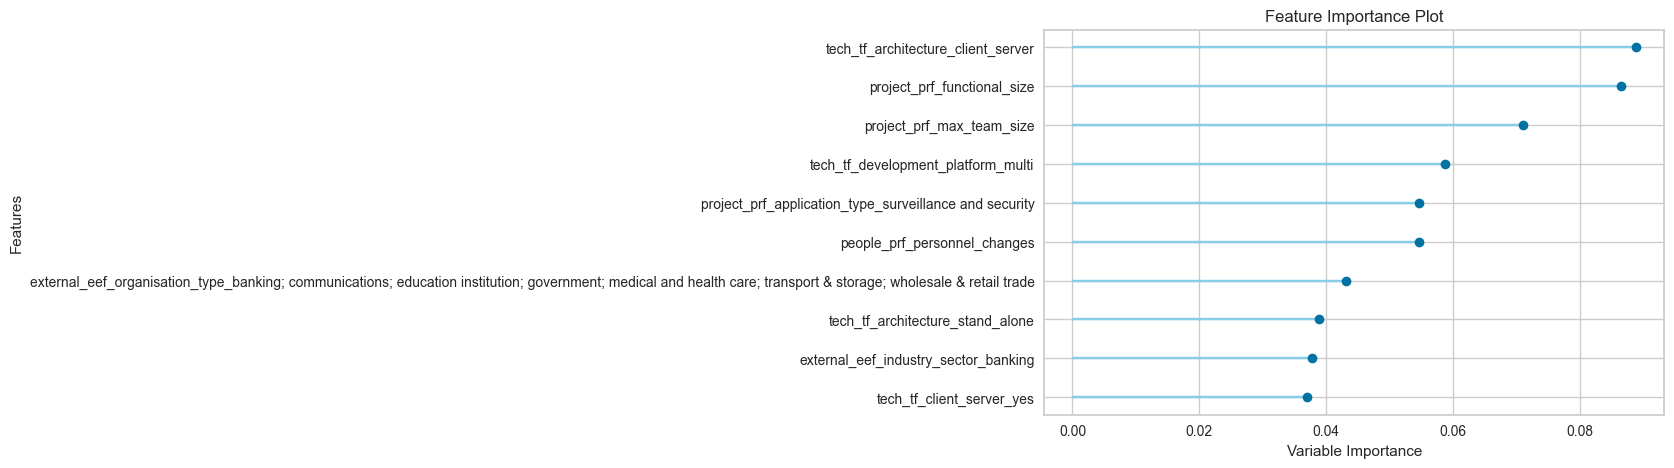

Feature importance plot saved to 'plots/feature_importance.png'


<Figure size 800x550 with 0 Axes>

Cell executed at: 2025-05-17 18:56:57.055564


In [35]:
# PyCaret's built-in feature importance plot
print("\nGenerating PyCaret feature importance plot...")
try:
    # Use plt.savefig() instead of filename parameter
        import matplotlib.pyplot as plt
        
        # Create the feature importance plot
        plot_model(tuned_model, plot='feature', save=False)
        plt.savefig('plots/feature_importance.png')
        print("Feature importance plot saved to 'plots/feature_importance.png'")
except Exception as e:
    print(f"Could not generate feature plot with PyCaret: {e}")
    
    # If PyCaret's plot_model doesn't work, fall back to our custom function
    try:
        importance_df = plot_huber_feature_importance(tuned_model, pycaret_X, pycaret_y, 
                                                    feature_names=pycaret_X.columns.tolist(), 
                                                    method='coefficients')
        print("Top 5 important features:")
        print(importance_df.head(5))
    except Exception as e2:
        print(f"Could not generate feature plot with custom function either: {e2}")

In [36]:
# For coefficient-based feature importance
print("\nGenerating feature importance plot...")
try:
    # Use pycaret_X and pycaret_y instead of X and y
    # Get feature names from pycaret_X
    feature_names = pycaret_X.columns.tolist()
    
    importance_df = plot_huber_feature_importance(tuned_model, pycaret_X, pycaret_y, 
                                                feature_names=feature_names, 
                                                method='coefficients')
    print("Top 5 important features:")
    print(importance_df.head(5))
except Exception as e:
    print(f"Could not generate feature plot: {e}")

# For permutation-based feature importance
print("\nGenerating permutation-based feature importance plot...")
try:
    importance_df_perm = plot_huber_feature_importance(tuned_model, pycaret_X, pycaret_y, 
                                                     feature_names=feature_names, 
                                                     method='permutation')
    print("Top 5 important features (permutation):")
    print(importance_df_perm.head(5))
except Exception as e:
    print(f"Could not generate permutation feature plot: {e}")


Generating feature importance plot...
Could not generate feature plot: 'RandomForestRegressor' object has no attribute 'coef_'

Generating permutation-based feature importance plot...
Could not generate permutation feature plot: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- external_eef_industry_sector
- external_eef_organisation_type
- project_prf_application_type
- tech_tf_server_roles
Feature names seen at fit time, yet now missing:
- external_eef_industry_sector_Missing
- external_eef_industry_sector_banking
- external_eef_industry_sector_communication
- external_eef_industry_sector_education
- external_eef_industry_sector_electronics & computers
- ...



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Cell executed at: 2025-05-17 18:56:57.091623


[Back to top](#Index:)

<a id='part9'></a>

# Part 9 - SHAP Analysis

xxx


Attempting SHAP analysis with improved data handling...
Transformed feature matrix shape: (85, 123)
Data converted to float64 type to avoid SHAP errors
Model type: RandomForestRegressor
Using TreeExplainer for tree-based model


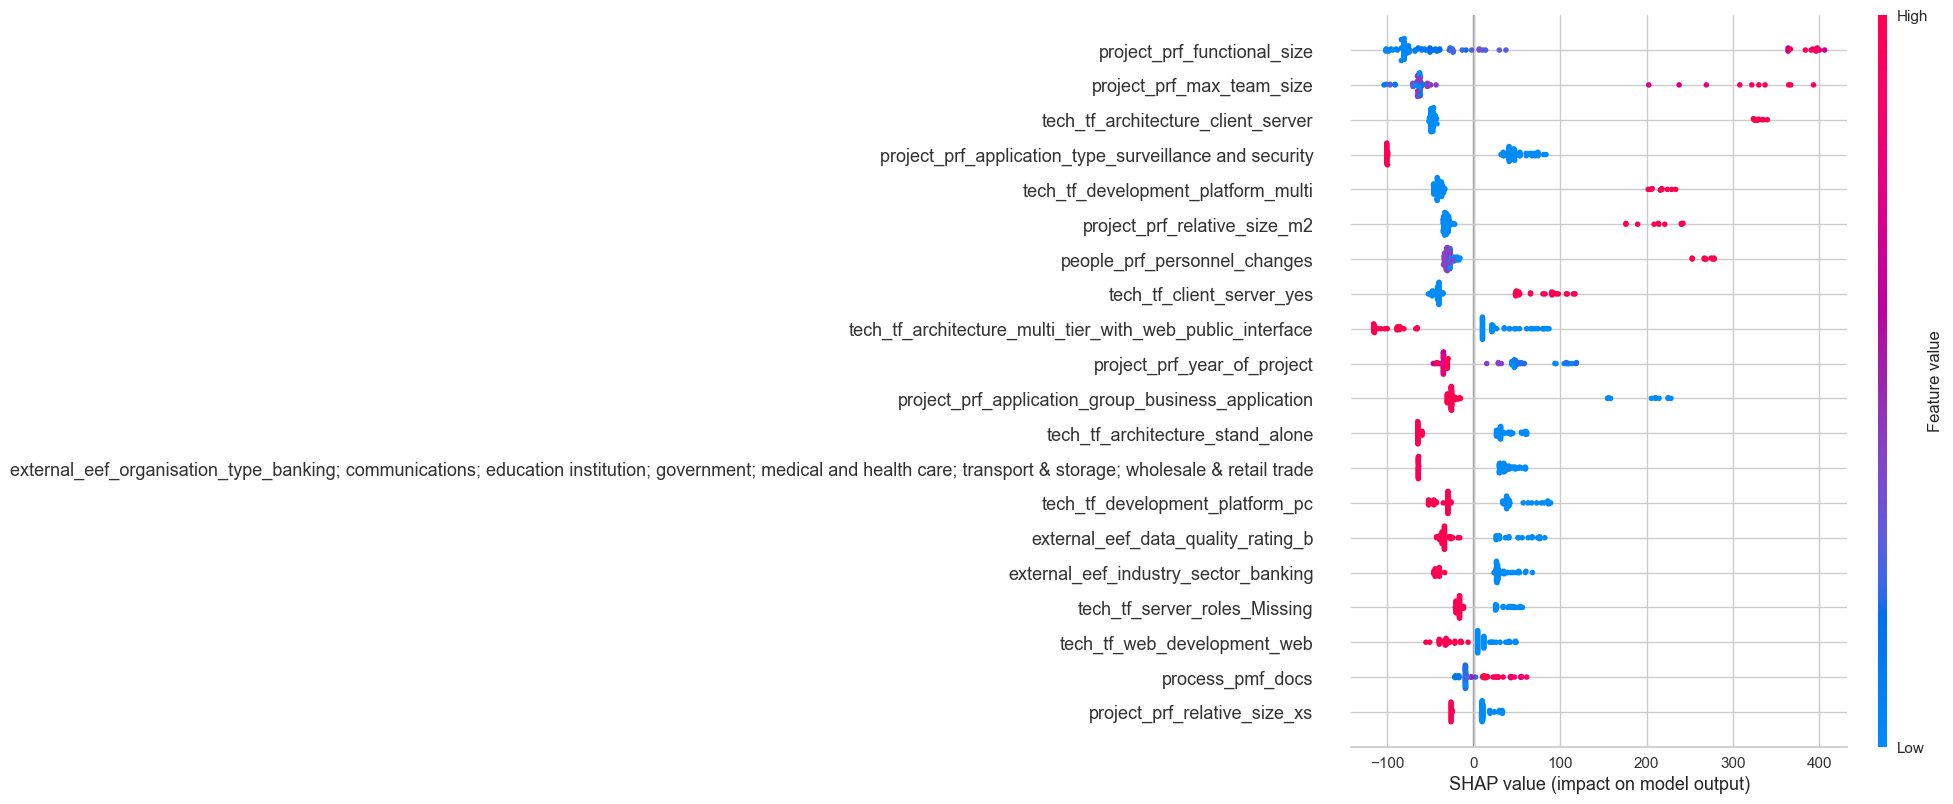

SHAP summary plot saved as plots/shap_summary.png


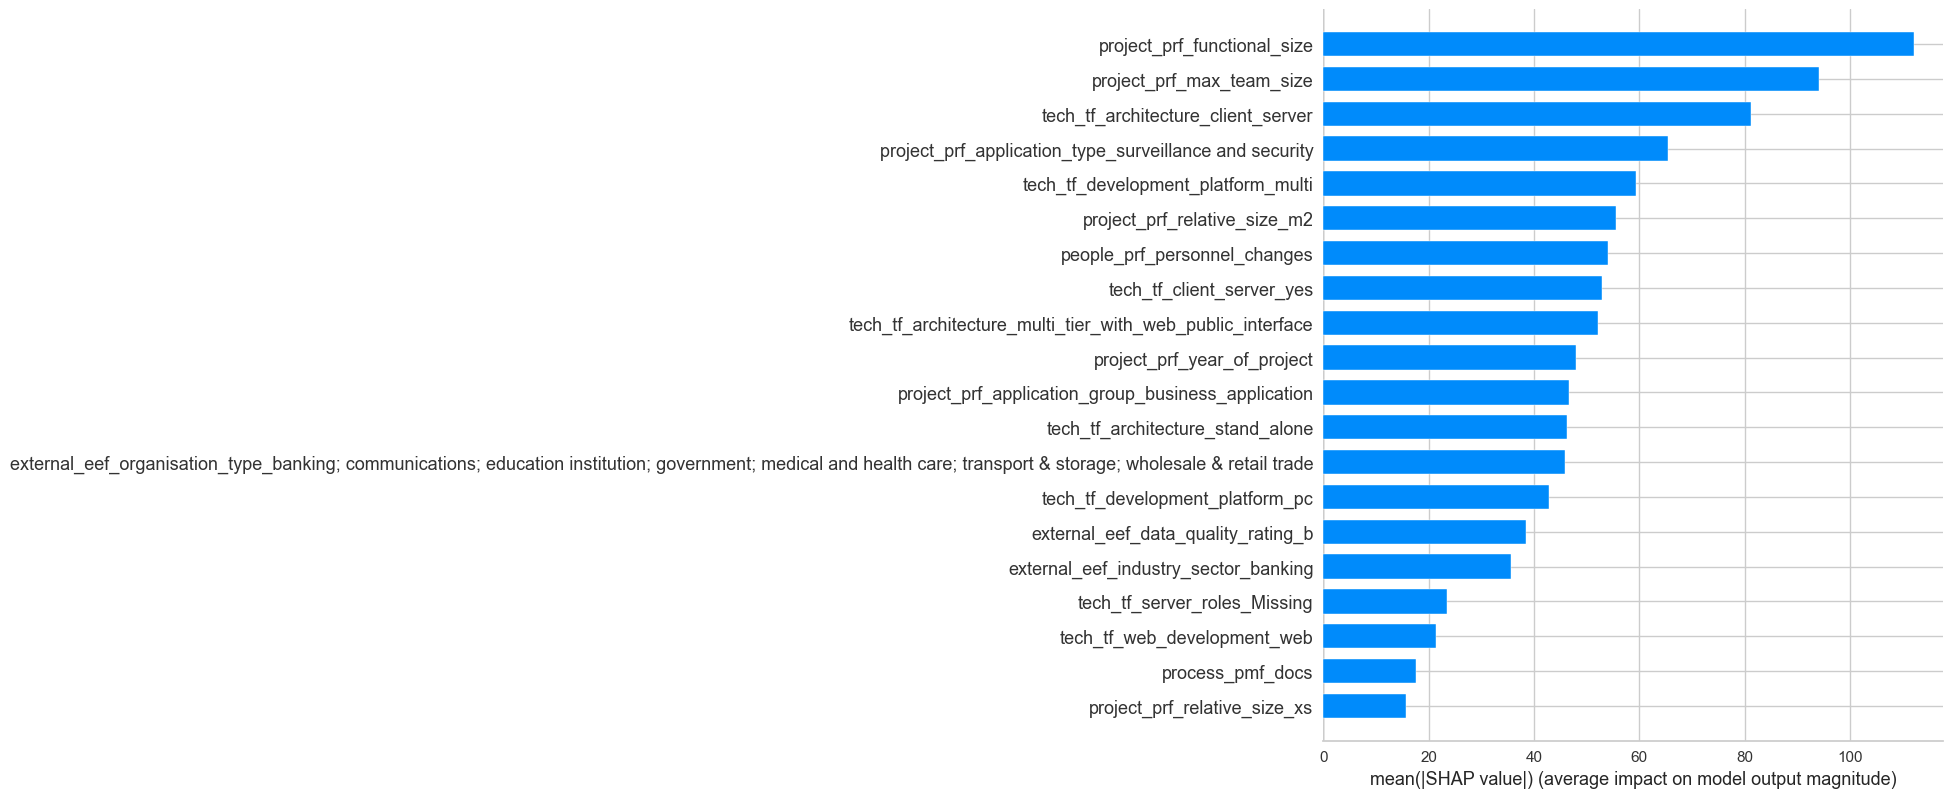

SHAP feature importance bar plot saved as plots/shap_importance_bar.png


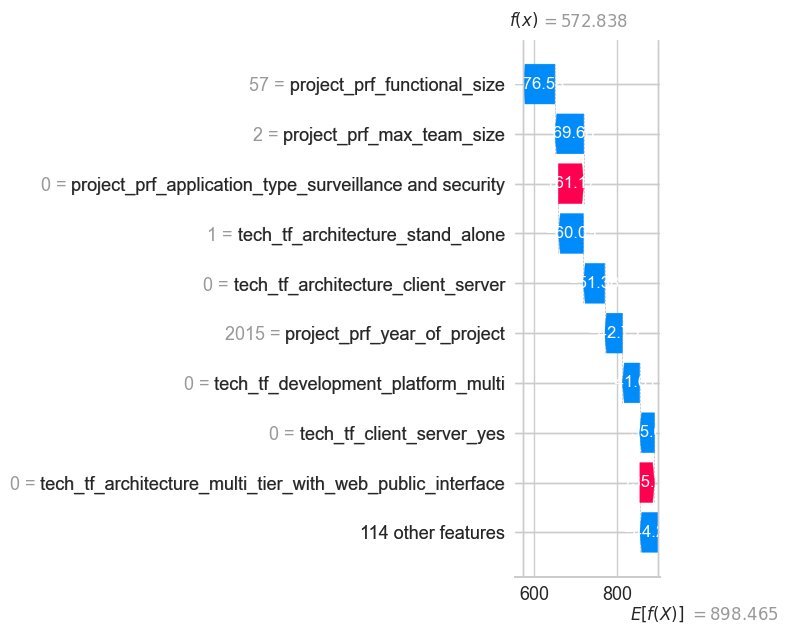

SHAP waterfall plot saved as plots/shap_waterfall.png
Cell executed at: 2025-05-17 18:57:05.271193


In [37]:
# SHAP analysis with proper data type handling
print("\nAttempting SHAP analysis with improved data handling...")
try:
    import shap
    import os
    import numpy as np
    import pandas as pd
    from pycaret.regression import get_config
    import matplotlib.pyplot as plt
    
    # Create directories for output
    os.makedirs('plots', exist_ok=True)
    
    # Get the transformed data
    X_transformed = get_config('X_transformed')
    print(f"Transformed feature matrix shape: {X_transformed.shape}")
    
    # Convert data to float64 to avoid data type issues
    X_transformed_float = X_transformed.astype(np.float64)
    print("Data converted to float64 type to avoid SHAP errors")
    
    # Get feature names if possible
    try:
        feature_names = get_config('X').columns.tolist()
    except:
        feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]
    
    # Determine the right SHAP explainer based on model type
    model_type = str(type(tuned_model)).lower()
    print(f"Model type: {type(tuned_model).__name__}")
    
    if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradientboosting']):
        print("Using TreeExplainer for tree-based model")
        explainer = shap.TreeExplainer(tuned_model)
        shap_values = explainer(X_transformed_float)
    elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso', 'huber']):
        print("Using LinearExplainer for linear model")
        explainer = shap.LinearExplainer(tuned_model, X_transformed_float)
        shap_values = explainer(X_transformed_float)
    else:
        print("Using KernelExplainer as fallback (this might be slow)")
        # For more complex models, use KernelExplainer with a subset of data for speed
        sample_size = min(50, X_transformed_float.shape[0])
        sample_indices = np.random.choice(X_transformed_float.shape[0], sample_size, replace=False)
        X_sample = X_transformed_float[sample_indices]
        
        # Create a prediction function that returns a numpy array
        def model_predict(X):
            return tuned_model.predict(X)
        
        explainer = shap.KernelExplainer(model_predict, X_sample)
        shap_values = explainer.shap_values(X_sample)
    
    # Generate and save SHAP summary plot
    plt.figure(figsize=(12, 10))
    if isinstance(shap_values, np.ndarray):
        shap.summary_plot(shap_values, X_transformed_float if not 'X_sample' in locals() else X_sample, 
                          feature_names=feature_names, show=False)
    else:
        shap.summary_plot(shap_values, show=False)
    plt.tight_layout()
    plt.savefig('plots/shap_summary.png')
    plt.show()
    plt.close()
    print("SHAP summary plot saved as plots/shap_summary.png")
    
    # Create a bar plot of mean absolute SHAP values
    plt.figure(figsize=(12, 8))
    if isinstance(shap_values, np.ndarray):
        shap.summary_plot(shap_values, X_transformed_float if not 'X_sample' in locals() else X_sample, 
                          feature_names=feature_names, plot_type="bar", show=False)
    else:
        shap.summary_plot(shap_values, plot_type="bar", show=False)
    plt.tight_layout()
    plt.savefig('plots/shap_importance_bar.png')
    plt.show()
    plt.close()
    print("SHAP feature importance bar plot saved as plots/shap_importance_bar.png")
    
    # Try to create waterfall plot for first instance
    try:
        plt.figure(figsize=(10, 8))
        if isinstance(shap_values, np.ndarray):
            shap.plots.waterfall(shap_values[0], show=False)
        else:
            shap.plots.waterfall(shap_values[0], show=False)
        plt.tight_layout()
        plt.savefig('plots/shap_waterfall.png')
        plt.show()
        plt.close()
        print("SHAP waterfall plot saved as plots/shap_waterfall.png")
    except Exception as e:
        print(f"Could not create waterfall plot: {e}")
    
except Exception as e:
    print(f"SHAP analysis failed: {e}")
    
    # Try PyCaret's SHAP plot as fallback
    print("\nTrying PyCaret's built-in SHAP plot...")
    try:
        from pycaret.regression import plot_model
        plot_model(tuned_model, plot='shap', save=True)
        print("SHAP plot created using PyCaret's built-in functionality")
    except Exception as e2:
        print(f"PyCaret's SHAP plot also failed: {e2}")
        print("\nRecommendation: Rely on the feature importance plot that was successfully created earlier")

In [46]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Check if required packages are installed and install if needed
def check_and_install_packages():
    try:
        import shap
        from pycaret.regression import get_config
        print("✅ All required packages are installed.")
        return True
    except ImportError as e:
        missing_package = str(e).split("'")[1]
        print(f"❌ Missing package: {missing_package}")
        install = input(f"Would you like to install {missing_package}? (y/n): ")
        if install.lower() == 'y':
            import sys
            import subprocess
            subprocess.check_call([sys.executable, "-m", "pip", "install", missing_package])
            print(f"✅ {missing_package} installed successfully.")
            return True
        else:
            print(f"⚠️ Please install {missing_package} to proceed.")
            return False

Cell executed at: 2025-05-17 21:27:11.674260


In [ ]:
# SHAP analysis with proper data type handling and debugging
def run_shap_analysis(tuned_model, model_index=1, debug=True):
    """
    Run SHAP analysis on a tuned model with enhanced debugging
    
    Parameters:
    tuned_model: The trained model to analyze
    model_index: Index for file naming (default: 1)
    debug: Enable detailed debugging output (default: True)
    """
    print(f"\n{'='*50}")
    print(f"SHAP Analysis for Model {model_index}")
    print(f"{'='*50}")
    
    try:
        import shap
        import os
        import numpy as np
        import pandas as pd
        from pycaret.regression import get_config
        import matplotlib.pyplot as plt
        
        # Create directories for output with confirmation
        os.makedirs('plots', exist_ok=True)
        if debug:
            print(f"✅ Output directory created: {os.path.abspath('plots')}")
        
        # Get the transformed data with error checking
        try:
            X_transformed = get_config('X_transformed')
            if debug:
                print(f"✅ Successfully retrieved transformed data")
                print(f"   Shape: {X_transformed.shape}")
                print(f"   Data types: {X_transformed.dtypes.value_counts()}")
                print(f"   Contains NaN: {np.isnan(X_transformed).any()}")
        except Exception as e:
            print(f"❌ Error getting transformed data: {e}")
            print("   Trying alternative approach...")
            try:
                # Try to get raw data as fallback
                X = get_config('X')
                X_transformed = X
                print(f"✅ Using raw features instead. Shape: {X_transformed.shape}")
            except Exception as e2:
                print(f"❌ Error getting raw data: {e2}")
                raise ValueError("Could not access training data")
        
        # Get model name for file naming
        model_name = type(tuned_model).__name__
        if debug:
            print(f"✅ Model identified as: {model_name}")
        
        # Convert data to float64 to avoid data type issues
        try:
            X_transformed_float = X_transformed.astype(np.float64)
            if debug:
                print("✅ Data successfully converted to float64 type")
        except Exception as e:
            print(f"❌ Error converting data types: {e}")
            print("   Trying alternative conversion method...")
            try:
                # Try column-by-column conversion
                X_transformed_float = X_transformed.copy()
                for col in X_transformed.columns:
                    X_transformed_float[col] = pd.to_numeric(X_transformed[col], errors='coerce')
                X_transformed_float = X_transformed_float.fillna(0)
                print("✅ Data converted using alternative method")
            except:
                print("❌ Could not convert data. Proceeding with original data.")
                X_transformed_float = X_transformed
        
        # Get feature names if possible
        try:
            feature_names = get_config('X').columns.tolist()
            if debug:
                print(f"✅ Retrieved {len(feature_names)} feature names")
        except:
            feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]
            print(f"⚠️ Could not get original feature names, using generic names")
        
        # Determine the right SHAP explainer based on model type
        model_type = str(type(tuned_model)).lower()
        if debug:
            print(f"📊 Model type details: {model_type}")
        
        # Set matplotlib to explicitly show plots in Jupyter
        plt.ion()  # Turn on interactive mode
        
        # Create explainer based on model type
        sample_size = min(100, X_transformed_float.shape[0])
        sample_indices = np.random.choice(X_transformed_float.shape[0], sample_size, replace=False)
        X_sample = X_transformed_float.iloc[sample_indices] if hasattr(X_transformed_float, 'iloc') else X_transformed_float[sample_indices]
        
        if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradientboosting']):
            print("🌲 Using TreeExplainer for tree-based model")
            try:
                explainer = shap.TreeExplainer(tuned_model)
                shap_values = explainer(X_sample)
                if debug:
                    print("✅ TreeExplainer created successfully")
            except Exception as e:
                print(f"❌ TreeExplainer failed: {e}")
                raise
        elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso', 'huber']):
            print("📏 Using LinearExplainer for linear model")
            try:
                explainer = shap.LinearExplainer(tuned_model, X_sample)
                shap_values = explainer(X_sample)
                if debug:
                    print("✅ LinearExplainer created successfully")
            except Exception as e:
                print(f"❌ LinearExplainer failed: {e}")
                raise
        else:
            print("🔄 Using KernelExplainer as fallback (this might be slow)")
            try:
                # Create a prediction function that returns a numpy array
                def model_predict(X):
                    return tuned_model.predict(X)
                
                explainer = shap.KernelExplainer(model_predict, X_sample)
                shap_values = explainer.shap_values(X_sample)
                if debug:
                    print("✅ KernelExplainer created successfully")
            except Exception as e:
                print(f"❌ KernelExplainer failed: {e}")
                raise
        
        # Generate and save SHAP summary plot
        try:
            plt.figure(figsize=(12, 10))
            if isinstance(shap_values, np.ndarray):
                shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
            else:
                shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names, show=False)
            plt.tight_layout()
            summary_path = f'plots/shap_summary_model{model_index}_{model_name}.png'
            plt.savefig(summary_path)
            plt.show()
            plt.close()
            print(f"✅ SHAP summary plot saved to {os.path.abspath(summary_path)}")
        except Exception as e:
            print(f"❌ Error creating summary plot: {e}")
        
        # Create a bar plot of mean absolute SHAP values
        try:
            plt.figure(figsize=(12, 8))
            if isinstance(shap_values, np.ndarray):
                shap.summary_plot(shap_values, X_sample, feature_names=feature_names, plot_type="bar", show=False)
            else:
                shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names, plot_type="bar", show=False)
            plt.tight_layout()
            bar_path = f'plots/shap_importance_bar_model{model_index}_{model_name}.png'
            plt.savefig(bar_path)
            plt.show()
            plt.close()
            print(f"✅ SHAP feature importance bar plot saved to {os.path.abspath(bar_path)}")
        except Exception as e:
            print(f"❌ Error creating bar plot: {e}")
        
        # Try to create waterfall plot for first instance
        try:
            plt.figure(figsize=(10, 8))
            if isinstance(shap_values, np.ndarray):
                shap.plots.waterfall(shap_values[0], show=False)
            else:
                shap.plots.waterfall(shap_values[0], show=False)
            plt.tight_layout()
            waterfall_path = f'plots/shap_waterfall_model{model_index}_{model_name}.png'
            plt.savefig(waterfall_path)
            plt.show()
            plt.close()
            print(f"✅ SHAP waterfall plot saved to {os.path.abspath(waterfall_path)}")
        except Exception as e:
            print(f"❌ Could not create waterfall plot: {e}")
        
        print("\n✅ SHAP analysis completed successfully!")
        return True
        
    except Exception as e:
        print(f"\n❌ SHAP analysis failed: {e}")
        
        # Try PyCaret's SHAP plot as fallback
        print("\n⚠️ Trying PyCaret's built-in SHAP plot as fallback...")
        try:
            from pycaret.regression import plot_model
            plot_model(tuned_model, plot='shap', save=True)
            print("✅ SHAP plot created using PyCaret's built-in functionality")
            return True
        except Exception as e2:
            print(f"❌ PyCaret's SHAP plot also failed: {e2}")
            print("\n💡 Recommendations:")
            print("   1. Check if your model is compatible with SHAP")
            print("   2. Try running just the model importance plot: plot_model(tuned_model, plot='feature')")
            print("   3. Make sure your model is properly trained and accessible")
            print("   4. Verify that you have the latest versions of SHAP and matplotlib")
            return False

# Example usage - uncomment and run this part to test the function
"""
# First check if required packages are installed
if check_and_install_packages():
    # If you have a trained model from PyCaret, use it like this:
    from pycaret.regression import load_model, setup, get_config
    
    # Load your dataset and set up PyCaret (replace with your actual code)
    # df = pd.read_csv('your_dataset.csv')
    # setup(df, target='your_target_column')
    
    # Either load an existing model or use your already trained model
    try:
        # If you have a saved model:
        model = load_model('your_saved_model_path')
        print("Model loaded successfully!")
    except:
        print("Please replace 'your_saved_model_path' with your actual model path")
        print("Or use your existing trained model variable")
        # model = your_existing_trained_model_variable
    
    # Call the SHAP analysis function with your model
    # run_shap_analysis(model, model_index=1, debug=True)
"""

# Use this to check if your plots directory exists and what's in it
def check_outputs():
    print("\nChecking for output files:")
    try:
        if os.path.exists('plots'):
            files = os.listdir('plots')
            if files:
                print(f"✅ Found {len(files)} files in plots directory:")
                for file in files:
                    print(f"   - {file}")
            else:
                print("⚠️ 'plots' directory exists but is empty")
        else:
            print("❌ 'plots' directory does not exist")
    except Exception as e:
        print(f"❌ Error checking outputs: {e}")

In [45]:
# with errors

# SHAP analysis with proper data type handling
def run_shap_analysis(tuned_model, model_index=1):
    """
    Run SHAP analysis on a tuned model
    
    Parameters:
    tuned_model: The trained model to analyze
    model_index: Index for file naming (default: 1)
    """
    print(f"\nAttempting SHAP analysis for model {model_index}...")
    try:
        import shap
        import os
        import numpy as np
        import pandas as pd
        from pycaret.regression import get_config
        import matplotlib.pyplot as plt
        
        # Create directories for output
        os.makedirs('plots', exist_ok=True)
        
        # Get the transformed data
        X_transformed = get_config('X_transformed')
        print(f"Transformed feature matrix shape: {X_transformed.shape}")
        
        # Get model name for file naming
        model_name = type(tuned_model).__name__
        
        # Convert data to float64 to avoid data type issues
        X_transformed_float = X_transformed.astype(np.float64)
        print("Data converted to float64 type to avoid SHAP errors")
        
        # Get feature names if possible
        try:
            feature_names = get_config('X').columns.tolist()
        except:
            feature_names = [f"Feature_{i}" for i in range(X_transformed.shape[1])]
        
        # Determine the right SHAP explainer based on model type
        model_type = str(type(tuned_model)).lower()
        print(f"Model type: {model_name}")
        
        if any(x in model_type for x in ['tree', 'forest', 'xgboost', 'lgbm', 'catboost', 'gradientboosting']):
            print("Using TreeExplainer for tree-based model")
            explainer = shap.TreeExplainer(tuned_model)
            shap_values = explainer(X_transformed_float)
        elif any(x in model_type for x in ['linear', 'logistic', 'ridge', 'lasso', 'huber']):
            print("Using LinearExplainer for linear model")
            explainer = shap.LinearExplainer(tuned_model, X_transformed_float)
            shap_values = explainer(X_transformed_float)
        else:
            print("Using KernelExplainer as fallback (this might be slow)")
            # For more complex models, use KernelExplainer with a subset of data for speed
            sample_size = min(50, X_transformed_float.shape[0])
            sample_indices = np.random.choice(X_transformed_float.shape[0], sample_size, replace=False)
            X_sample = X_transformed_float[sample_indices]
            
            # Create a prediction function that returns a numpy array
            def model_predict(X):
                return tuned_model.predict(X)
            
            explainer = shap.KernelExplainer(model_predict, X_sample)
            shap_values = explainer.shap_values(X_sample)
        
        # Generate and save SHAP summary plot
        plt.figure(figsize=(12, 10))
        if isinstance(shap_values, np.ndarray):
            shap.summary_plot(shap_values, X_transformed_float if not 'X_sample' in locals() else X_sample, 
                              feature_names=feature_names, show=False)
        else:
            shap.summary_plot(shap_values, show=False)
        plt.tight_layout()
        plt.savefig(f'plots/shap_summary_model{model_index}_{model_name}.png')
        plt.show()
        plt.close()
        print(f"SHAP summary plot saved as plots/shap_summary_model{model_index}_{model_name}.png")
        
        # Create a bar plot of mean absolute SHAP values
        plt.figure(figsize=(12, 8))
        if isinstance(shap_values, np.ndarray):
            shap.summary_plot(shap_values, X_transformed_float if not 'X_sample' in locals() else X_sample, 
                              feature_names=feature_names, plot_type="bar", show=False)
        else:
            shap.summary_plot(shap_values, plot_type="bar", show=False)
        plt.tight_layout()
        plt.savefig(f'plots/shap_importance_bar_model{model_index}_{model_name}.png')
        plt.show()
        plt.close()
        print(f"SHAP feature importance bar plot saved as plots/shap_importance_bar_model{model_index}_{model_name}.png")
        
        # Try to create waterfall plot for first instance
        try:
            plt.figure(figsize=(10, 8))
            if isinstance(shap_values, np.ndarray):
                shap.plots.waterfall(shap_values[0], show=False)
            else:
                shap.plots.waterfall(shap_values[0], show=False)
            plt.tight_layout()
            plt.savefig(f'plots/shap_waterfall_model{model_index}_{model_name}.png')
            plt.show()
            plt.close()
            print(f"SHAP waterfall plot saved as plots/shap_waterfall_model{model_index}_{model_name}.png")
        except Exception as e:
            print(f"Could not create waterfall plot: {e}")
        
        return True
        
    except Exception as e:
        print(f"SHAP analysis failed: {e}")
        
        # Try PyCaret's SHAP plot as fallback
        print("\nTrying PyCaret's built-in SHAP plot...")
        try:
            from pycaret.regression import plot_model
            plot_model(tuned_model, plot='shap', save=True)
            print("SHAP plot created using PyCaret's built-in functionality")
            return True
        except Exception as e2:
            print(f"PyCaret's SHAP plot also failed: {e2}")
            print("\nRecommendation: Rely on the feature importance plot that was successfully created earlier")
            return False

Cell executed at: 2025-05-17 21:13:16.009214


In [38]:
# Extract feature importance directly (if available)
print("\nExtracting direct feature importance...")
try:
    if hasattr(tuned_model, 'feature_importances_'):
        # Make sure the feature names and importance values match in length
        feature_names = get_config('X_transformed').columns
        importances = tuned_model.feature_importances_
        
        # Ensure lengths match
        if len(feature_names) != len(importances):
            print(f"Warning: Length mismatch - {len(feature_names)} features vs {len(importances)} importance values")
            # Use only the matching length
            min_length = min(len(feature_names), len(importances))
            feature_names = feature_names[:min_length]
            importances = importances[:min_length]
        
        # Create DataFrame with matching lengths
        fi = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        
        # Sort by importance value
        fi = fi.sort_values('importance', ascending=False)
        print(fi.head(15))  # Show top 15 features
        
        # Save to CSV
        fi.to_csv('data/feature_importance.csv', index=False)
        print("Feature importance saved to 'data/feature_importance.csv'")
    else:
        print("Feature importance attribute not available for this model")
except Exception as e:
    print(f"Failed to extract feature importance: {e}")


Extracting direct feature importance...
                                               feature  importance
113                 tech_tf_architecture_client_server    0.088813
55                         project_prf_functional_size    0.086489
56                           project_prf_max_team_size    0.070925
79                  tech_tf_development_platform_multi    0.058653
35   project_prf_application_type_surveillance and ...    0.054599
70                        people_prf_personnel_changes    0.054558
15   external_eef_organisation_type_banking; commun...    0.043037
116                   tech_tf_architecture_stand_alone    0.038834
4                 external_eef_industry_sector_banking    0.037780
118                          tech_tf_client_server_yes    0.036945
80                     tech_tf_development_platform_pc    0.036848
72   project_prf_application_group_business_applica...    0.035495
85             tech_tf_primary_programming_language_c_    0.033849
0                    